In [129]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
bike_data = pd.read_csv("day.csv")
bike_data.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [70]:
bike_data.shape

(730, 16)

In [71]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [72]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [73]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values hence no need of any imputation

In [74]:
bike_data['dteday'] =  pd.to_datetime(bike_data['dteday'],format='%d-%m-%Y')
bike_data['dteday'].dtype

dtype('<M8[ns]')

In [75]:
bike_data['year'] = pd.DatetimeIndex(bike_data['dteday']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['dteday']).month

In [76]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [77]:
# Dropping the columns as we have extracte#d the correct year and month from the date.

bike_data.drop(['yr','mnth'],axis=1,inplace=True)

In [78]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

bike_data.drop('holiday',axis=1,inplace=True)

In [79]:
bike_data.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [80]:
bike_data.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [81]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_data['season'] = bike_data['season'].map(codes)

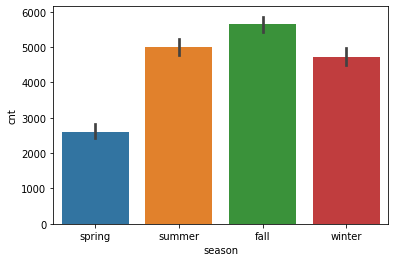

In [82]:
sns.barplot('season','cnt',data=bike_data)
plt.show()

Bike Rentals are more during the Fall(Monsoon) season

weathersit

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [83]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_data['weathersit'] = bike_data['weathersit'].map(codes)

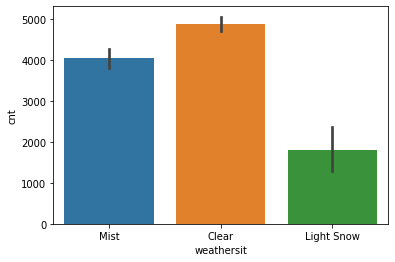

In [84]:
sns.barplot('weathersit','cnt',data=bike_data)
plt.show()

Bikes seem to be rented more in Partly cloudy weather

In [85]:
codes = {1:'working_day',0:'Holiday'}
bike_data['workingday'] = bike_data['workingday'].map(codes)

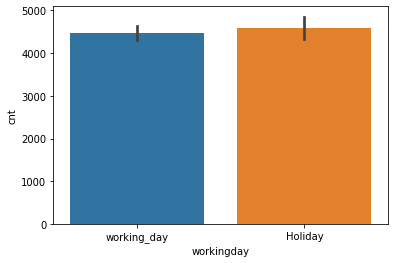

In [86]:
sns.barplot('workingday','cnt',data=bike_data)
plt.show()

In [87]:
codes = {2019:1,2018:0}
bike_data['year'] = bike_data['year'].map(codes)

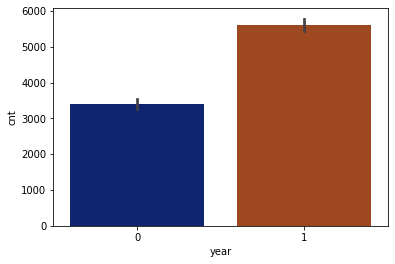

In [88]:
sns.barplot('year','cnt',data=bike_data,palette='dark')
plt.show()

Bike Rental popularity has increased in 2019 when compared to 2018

Month

1:Jan
    
2:Feb
    
3:Mar
    
4:Apr
    
5:May
    
6:June
    
7:July
    
8:Aug
    
9:Sep
    
10:Oct
    
11:Nov
    
12:Dec

In [89]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_data['month'] = bike_data['month'].map(codes)

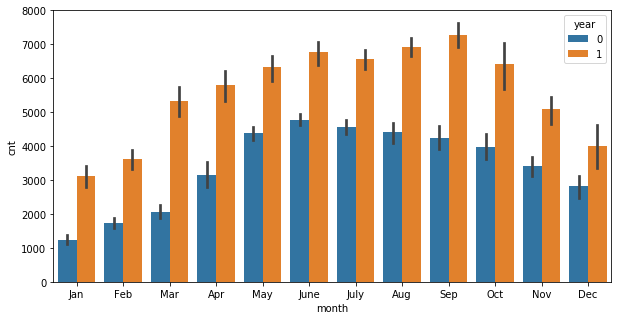

In [24]:
plt.figure(figsize=(10,5))
sns.barplot('month','cnt',hue='year',data=bike_data)
plt.show()

WeekDay:
0:Mon
1:Tue
2:Wed
3:Thu
4:Fri
5:Sat
6:Sun

In [90]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_data['weekday'] = bike_data['weekday'].map(codes)

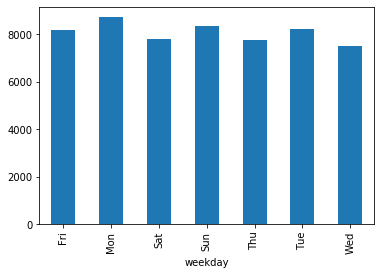

In [91]:
bike_data.groupby('weekday')['cnt'].max().plot(kind='bar')
plt.show()

Bike Rentals are maximum on Sunday and Monday

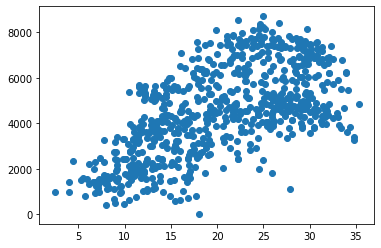

In [92]:
plt.scatter('temp','cnt',data=bike_data)
plt.show()

Bike Rentals are observed more at higher temperatures

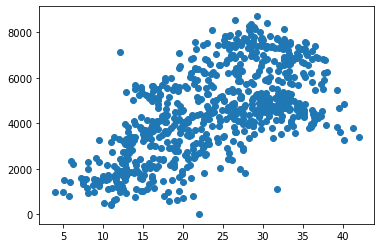

In [93]:
plt.scatter('atemp','cnt',data=bike_data)
plt.show()

Bike Rentals are observed at higher "feel-like" high temperatures

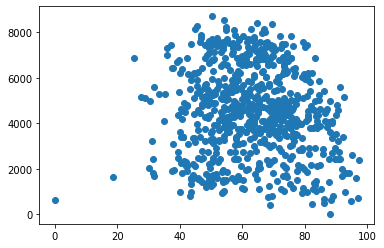

In [94]:
plt.scatter('hum','cnt',data=bike_data)
plt.show()

Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity

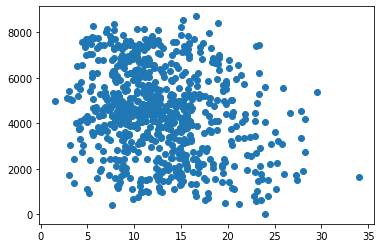

In [95]:
plt.scatter('windspeed','cnt',data=bike_data)
plt.show()

Wind speeds increase with a greater temperature difference.

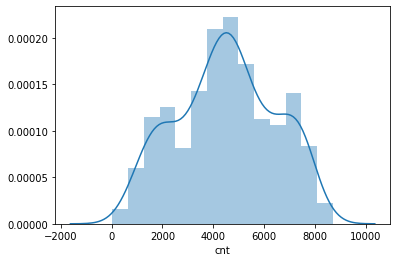

In [96]:
sns.distplot(bike_data['cnt'])
plt.show()

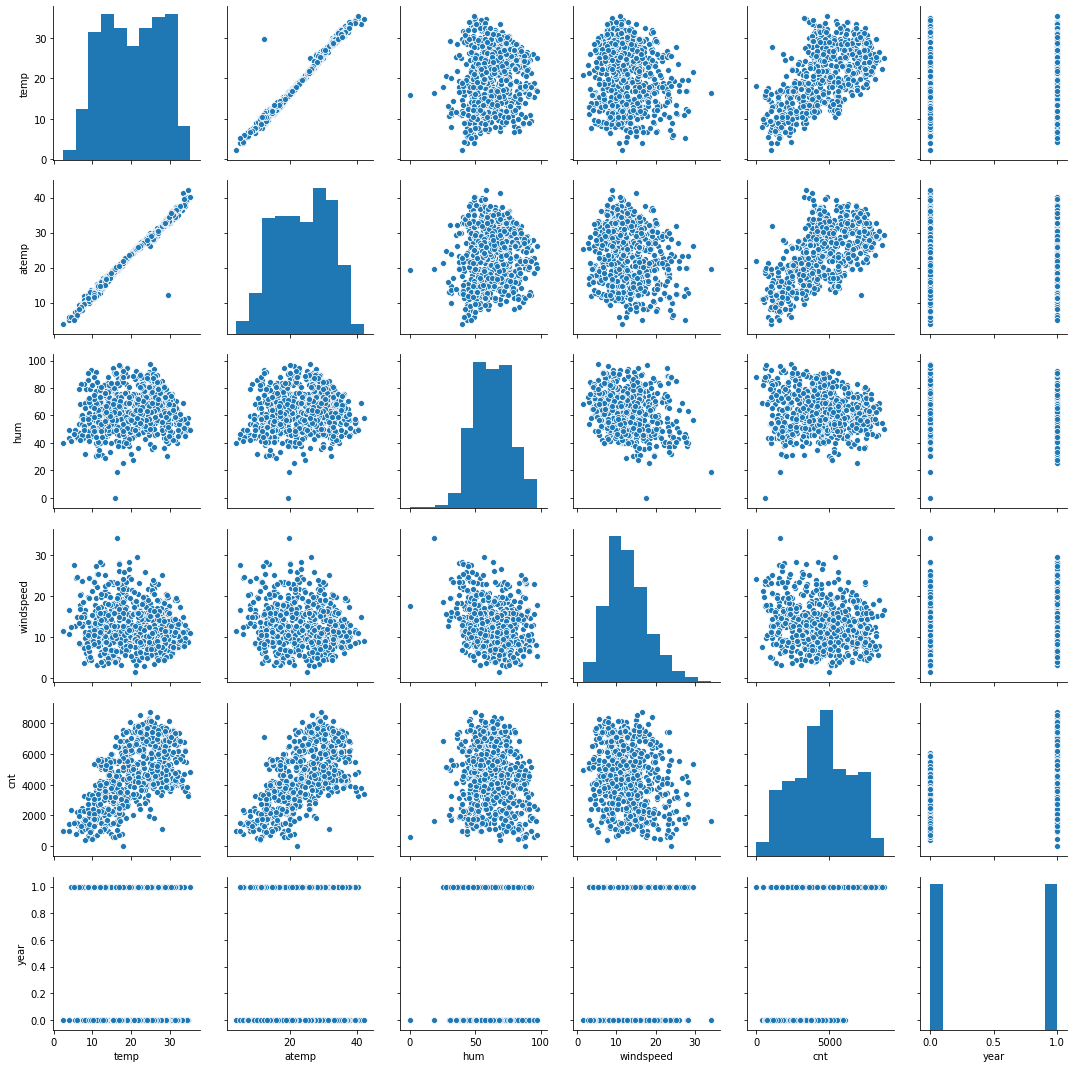

In [97]:
sns.pairplot(bike_data)
plt.show()

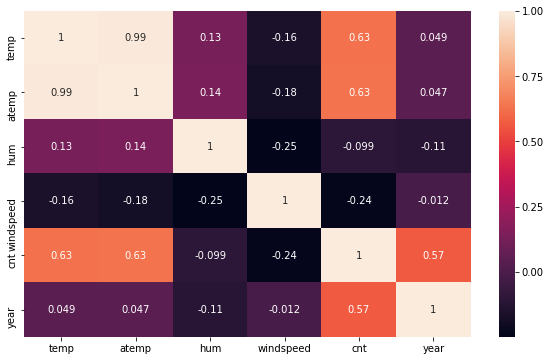

In [98]:
plt.figure(figsize = (10,6))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

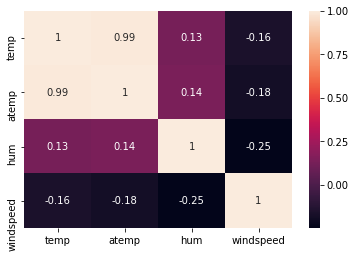

In [99]:
data= bike_data[['temp','atemp','hum','windspeed']]
sns.heatmap(data.corr(),annot=True)
plt.show()

It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity

In [100]:
bike_data.drop('atemp',axis=1,inplace=True)

In [101]:
bike_data.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


## Dealing With Categorical Variables

In [102]:
seasons = pd.get_dummies(bike_data['season'],drop_first=True)

working_day = pd.get_dummies(bike_data['workingday'],drop_first=True)

weather= pd.get_dummies(bike_data['weathersit'],drop_first=True)

month= pd.get_dummies(bike_data['month'],drop_first=True)

week_day= pd.get_dummies(bike_data['weekday'],drop_first=True)

In [103]:
bike_data= pd.concat([bike_data,seasons,working_day,weather,month,week_day],axis=1)

In [104]:
bike_data.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,spring,summer,winter,working_day,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [105]:
bike_data.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

## Splitting the Data into Training and Testing Sets

In [106]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [107]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [108]:
num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

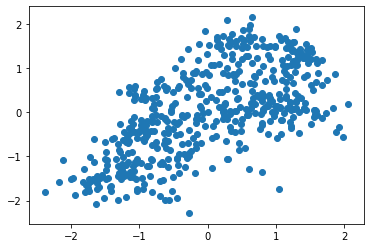

In [109]:
plt.scatter('temp','cnt',data=df_train)
plt.show()

## Dividing into X and Y sets for the model building

In [110]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model
Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [112]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [113]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [114]:
X_train_rfe = X_train[col]

In [115]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [116]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [117]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.16e-176
Time:                        20:10:56   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dropping Mon as it is insignificant

In [118]:
X_train1= X_train_rfe.drop('Mon',1)

In [119]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [120]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.73e-175
Time:                        20:11:03   Log-Likelihood:                -297.49
No. Observations:                 510   AIC:                             615.0
Df Residuals:                     500   BIC:                             657.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1902      0.059     -3.212      0.001      -0.307      -0.074
temp            0.4042      0.028     14.673      0.000       0.350       0.458
year            1.0463      0.039     26.730      0.000       0.969       1.123
spring         -0.6842      0.058    -11.865      0.000      -0.797      -0.571
working_day    -0.0278      0.054     -0.514      0.607      -0.134       0.078
Light Snow     -1.2901      0.117    -11.047      0.000      -1.519      -1.061
Mist           -0.3544      0.042     -8.490      0.000      -0.436      -0.272
July           -0.3052      0.083     -3.698      0.000      -0.467      -0.143
Sep             0.2731      0.075      3.662      0.000       0.127       0.420
Sun             0.0459      0.073      0.630      0.529      -0.097       0.189
==============================================================================
Omnibus:                       60.871   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.020
Skew:                          -0.641   Prob(JB):                     3.94e-31
Kurtosis:                       5.224   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factor(VIF)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,inf
3,spring,inf
5,spring,inf
6,spring,inf
4,working_day,4.69
8,summer,3.28
1,year,2.04
0,temp,2.02
7,summer,1.68
11,Sun,1.65


All the variables have VIF less than 5

## Residual Analysis of the train data

In [123]:
y_train_pred = lm1.predict(X_train2)

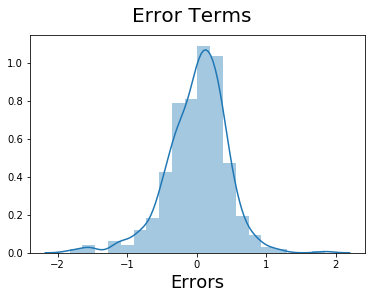

In [124]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Making Predictions

In [125]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [126]:
y_test = df_test.pop('cnt')
X_test = df_test

In [127]:
# let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [3]:
y_test_pred = lm1.predict(X_test_new)

NameError: name 'lm1' is not defined

In [4]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=18)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=16)
plt.show()

NameError: name 'plt' is not defined

## Model Evaluation

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predictions', fontsize=12) 
plt.show()

In [5]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

NameError: name 'y_test' is not defined

The important 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

Spring season : -0.6842

Temperature : 0.4042

Mist : -0.3544

Sun : 0.0459

working_day : -0.0278